<a href="https://colab.research.google.com/github/Margo-s-M/AI_Colab/blob/main/%D0%94%D0%97_7%D0%A1%D0%BE%D0%B1%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [325]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [326]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [327]:
df = df[['Size', 'Furnishing Status', 'City', 'Rent']]
df.head()

,Size,Furnishing Status,City,Rent
0,1100.0,Unfurnished,Kolkata,10000.0
1,800.0,Semi-Furnished,Kolkata,20000.0
2,1000.0,Semi-Furnished,Kolkata,17000.0
3,800.0,Unfurnished,Kolkata,10000.0
4,850.0,Unfurnished,Kolkata,7500.0


# Завдання 1
Ввиведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини. Цільова ознака `Rent`

In [328]:
df.describe()

,Size,Rent
count,4402.000000,4.369000e+03
mean,967.214675,3.461306e+04
std,636.118893,7.740818e+04
min,10.000000,1.200000e+03
25%,550.000000,1.000000e+04
50%,850.000000,1.600000e+04
75%,1200.000000,3.300000e+04
max,8000.000000,3.500000e+06


In [329]:
df.dtypes

,0
Size,float64
Furnishing Status,object
City,object
Rent,float64


<Axes: >

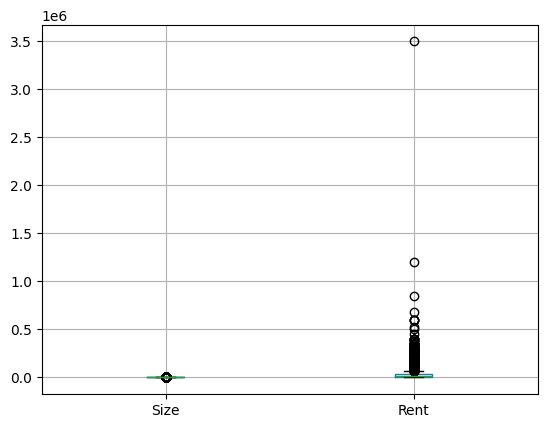

In [330]:
df.boxplot()

In [331]:
mask = df['Rent'] < 2e6
df = df[mask]

In [332]:
y = df['Rent']
X = df.drop(columns='Rent')

In [333]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
X.head()

,Size,Furnishing Status,City
0,1100.0,Unfurnished,Kolkata
1,800.0,Semi-Furnished,Kolkata
2,1000.0,Semi-Furnished,Kolkata
3,800.0,Unfurnished,Kolkata
4,850.0,Unfurnished,Kolkata


In [334]:
y.head()

,Rent
0,10000.0
1,20000.0
2,17000.0
3,10000.0
4,7500.0


# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [335]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [336]:
num_columns = X_train.select_dtypes(include='number').columns
cat_columns = X_train.select_dtypes(include='object').columns

In [337]:
num_pipline = Pipeline(
    [
        ('impute', SimpleImputer(strategy='mean'))
    ]
)
num_pipline

Pipeline(steps=[('impute', SimpleImputer())])

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [338]:
cat_pipline = Pipeline(
    [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]
)
cat_pipline


Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [339]:
preprocessor = ColumnTransformer(
    [
        ('num',num_pipline, num_columns),
        ('cat', cat_pipline, cat_columns)
    ]
)
preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['Size'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Furnishing Status', 'City'], dtype='object'))])

In [345]:
preprocessor.transform(X_train)

,num__Size,cat__Furnishing Status_Furnished,cat__Furnishing Status_Semi-Furnished,cat__Furnishing Status_Unfurnished,cat__City_Bangalore,cat__City_Chennai,cat__City_Delhi,cat__City_Hyderabad,cat__City_Kolkata,cat__City_Mumbai
2603,450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
876,2000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1805,400.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2897,400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
738,433.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3739,2000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
497,700.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3357,1700.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4093,1675.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Завдання 5
Створіть остаточну модель та натренуйте її

In [341]:
from sklearn.linear_model import LinearRegression

In [342]:
full_model =Pipeline(
    [
    ('prep', preprocessor),
    ('linear_regression', LinearRegression())
    ]
)

full_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['Size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Furnishing Status', 'City'], dtype='object'))])),
                ('linear_regression', LinearRegression())])

# Завдання 6
Виведіть основні метрики моделі

In [343]:
full_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['Size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Furnishing Status', 'City'], dtype='object'))])),
                ('linear_regression', LinearRegression())])

In [347]:
from sklearn import metrics

y_train_pred = full_model.predict(X_train)

metrics.r2_score(y_train_pred, y_train)

-0.33729898422563775

# Завдання 7
Спрогнозуйте ціну будинку

In [ ]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Mumbai']})

data

In [356]:
predict_price = full_model.predict(data)

predict_price


array([68137.52879422])